<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/ConfusionMatrix_R_Plotting_20240402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
install.packages("caret")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]


Skipping 1 packages not available: rgdal

Installing 4 packages: R.methodsS3, R.oo, rgdal, R.utils

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpFNTjtZ/remotes1027f1abb81/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpFNTjtZ/file102707548b1/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [2]:
library(googledrive)
library(raster)
library(magrittr)
library(data.table)
library(caret)
library(ggplot2)
library(tidyr)
drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp


Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:raster’:

    extract


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=0fcd4edda23ebd851cddf6d1b0ed31ca&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQlJha3FZQmhJSFdnem9kb3dxa0Z3ZndJRTdyLUtDTk9tc0FJTVZjM0NBSTdLRnJBNHZodUNZaW9rQzNkRUR3USIsInN0YXRlIjoiMGZjZDRlZGRhMjNlYmQ4NTFjZGRmNmQxYjBlZDMxY2EifQ==


In [ ]:
# https://drive.google.com/file/d/1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c/view?usp=drive_link
drive_download(file = as_id('1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c'), path =  '/content/1year.zip', overwrite = TRUE)

# https://drive.google.com/file/d/11uePUMaH5sYMIuqtjY7omum7QtBrfpjM/view?usp=drive_link
drive_download(file = as_id('11uePUMaH5sYMIuqtjY7omum7QtBrfpjM'), path =  '/content/2year.zip', overwrite = TRUE)

# https://drive.google.com/file/d/1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ/view?usp=drive_link
drive_download(file = as_id('1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ'), path =  '/content/3year.zip', overwrite = TRUE)

# https://drive.google.com/file/d/1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u/view?usp=drive_link
drive_download(file = as_id('1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u'), path =  '/content/groundtruth.zip', overwrite = TRUE)

In [4]:
unzip("/content/1year.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/1year", unzip = "internal",
      setTimes = FALSE)

unzip("/content/2year.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/2year", unzip = "internal",
      setTimes = FALSE)

unzip("/content/3year.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/3year", unzip = "internal",
      setTimes = FALSE)

unzip("/content/groundtruth.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/groundtruth", unzip = "internal",
      setTimes = FALSE)

In [5]:
# copy the final prediction to the main model folder for 1, 2, and 3 years
source_dir <- "/content/1year/model_03222023_1255/predictions"
destination_dir <- "/content/1year/model_03222023_1255"
tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
for (file in tif_files) {
  file_name <- basename(file)
  destination_file <- file.path(destination_dir, file_name)
  file.copy(file, destination_file)
}

source_dir <- "/content/2year/model_03222024_1255/predictions"
destination_dir <- "/content/2year/model_03222024_1255"
tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
for (file in tif_files) {
  file_name <- basename(file)
  destination_file <- file.path(destination_dir, file_name)
  file.copy(file, destination_file)
}

source_dir <- "/content/3year/model_03222023_1255/predictions"
destination_dir <- "/content/3year/model_03222023_1255"
tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
for (file in tif_files) {
  file_name <- basename(file)
  destination_file <- file.path(destination_dir, file_name)
  file.copy(file, destination_file)
}


In [6]:
file_list_01 <-list.files("/content/1year/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
names(file_list_01) <- list.files("/content/1year/model_03222023_1255", pattern = "*.tif")

file_list_02 <-list.files("/content/2year/model_03222024_1255", pattern = "*.tif", full.names = TRUE)
names(file_list_02) <- list.files("/content/2year/model_03222024_1255", pattern = "*.tif")

file_list_03 <-list.files("/content/3year/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
names(file_list_03) <- list.files("/content/3year/model_03222023_1255", pattern = "*.tif")

file_list_labels <-list.files("/content/groundtruth/test_labels", pattern = "*.tif", full.names = TRUE)

In [11]:
# file_list_labels

In [12]:
id_dt_01 <-data.table(
  path = file_list_01,
  label_path = file_list_labels %>% rep(11) %>% unlist,
  epoch = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[2]]}) %>% unlist,
  tile_id = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[3]]}) %>% unlist)

In [13]:
id_dt_01

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/1year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/1year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/1year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/1year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/1year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/1year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/1year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/1year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/1year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [14]:
id_dt_02 <-data.table(
  path = file_list_02,
  label_path = file_list_labels %>% rep(11) %>% unlist,
  epoch = (file_list_02 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[2]]}) %>% unlist,
  tile_id = (file_list_02 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[3]]}) %>% unlist)

In [15]:
id_dt_02

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/2year/model_03222024_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/2year/model_03222024_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/2year/model_03222024_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/2year/model_03222024_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/2year/model_03222024_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/2year/model_03222024_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/2year/model_03222024_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/2year/model_03222024_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/2year/model_03222024_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [16]:
id_dt_03 <-data.table(
  path = file_list_03,
  label_path = file_list_labels %>% rep(11) %>% unlist,
  epoch = (file_list_03 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[2]]}) %>% unlist,
  tile_id = (file_list_03 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[3]]}) %>% unlist)

In [17]:
id_dt_03

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/3year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/3year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/3year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/3year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/3year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/3year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/3year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/3year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/3year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [18]:
id_dt_01[tile_id=='planet',tile_id := epoch]
id_dt_01[tile_id==epoch,epoch := 50]

In [19]:
id_dt_01

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/1year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/1year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/1year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/1year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/1year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/1year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/1year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/1year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/1year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [20]:
id_dt_02[tile_id=='planet',tile_id := epoch]
id_dt_02[tile_id==epoch,epoch := 50]

In [22]:
id_dt_02

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/2year/model_03222024_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/2year/model_03222024_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/2year/model_03222024_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/2year/model_03222024_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/2year/model_03222024_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/2year/model_03222024_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/2year/model_03222024_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/2year/model_03222024_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/2year/model_03222024_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [21]:
id_dt_03[tile_id=='planet',tile_id := epoch]
id_dt_03[tile_id==epoch,epoch := 50]

In [23]:
id_dt_03

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/3year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/3year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/3year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif,/content/groundtruth/test_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/3year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif,/content/groundtruth/test_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/3year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif,/content/groundtruth/test_labels/2118_nwi_ccap_filled_utm4.tif,1,2118
/content/3year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif,/content/groundtruth/test_labels/2355_nwi_ccap_filled_utm4.tif,1,2355
/content/3year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif,/content/groundtruth/test_labels/823_nwi_ccap_filled_utm4.tif,1,823
/content/3year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif,/content/groundtruth/test_labels/1530_nwi_ccap_filled_utm4.tif,11,1530
/content/3year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif,/content/groundtruth/test_labels/1532_nwi_ccap_filled_utm4.tif,11,1532


In [24]:
confusion_dt_01 <-
1:nrow(id_dt_01) %>%
  lapply(function(x){
  print(id_dt_01[x,]$path)
  predict_rast <- stack(id_dt_01[x,]$path)
  label_rast <- stack(id_dt_01[x,]$label_path)

  out_dt_01 <- data.table(prediction = values(predict_rast) %>% unlist,label = values(label_rast) %>% unlist)
  names(out_dt_01) <- c('prediction','label')
  out_dt_01$epoch <- id_dt_01[x,]$epoch
  out_dt_01$tile_id	 <- id_dt_01[x,]$tile_id
  return(out_dt_01)
  })  %>% rbindlist

[1] "/content/1year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_1546_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_1557_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_2118_planet_stack_utm4.tif"
[1] "/content/1year/model_03222023_1255/epoch_11_2355_planet_stack_utm4.tif"
[1] "/c

In [25]:
confusion_dt_01

prediction,label,epoch,tile_id
<dbl>,<dbl>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [26]:
confusion_dt_02 <-
1:nrow(id_dt_02) %>%
  lapply(function(x){
  print(id_dt_02[x,]$path)
  predict_rast <- stack(id_dt_02[x,]$path)
  label_rast <- stack(id_dt_02[x,]$label_path)

  out_dt_02 <- data.table(prediction = values(predict_rast) %>% unlist,label = values(label_rast) %>% unlist)
  names(out_dt_02) <- c('prediction','label')
  out_dt_02$epoch <- id_dt_02[x,]$epoch
  out_dt_02$tile_id	 <- id_dt_02[x,]$tile_id
  return(out_dt_02)
  })  %>% rbindlist

[1] "/content/2year/model_03222024_1255/epoch_1_1530_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_1532_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_1546_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_1557_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_2118_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_2355_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_1_823_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_1530_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_1532_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_1546_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_1557_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_2118_planet_stack_utm4.tif"
[1] "/content/2year/model_03222024_1255/epoch_11_2355_planet_stack_utm4.tif"
[1] "/c

In [27]:
confusion_dt_02

prediction,label,epoch,tile_id
<dbl>,<dbl>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [28]:
confusion_dt_03 <-
1:nrow(id_dt_03) %>%
  lapply(function(x){
  print(id_dt_03[x,]$path)
  predict_rast <- stack(id_dt_03[x,]$path)
  label_rast <- stack(id_dt_03[x,]$label_path)

  out_dt_03 <- data.table(prediction = values(predict_rast) %>% unlist,label = values(label_rast) %>% unlist)
  names(out_dt_03) <- c('prediction','label')
  out_dt_03$epoch <- id_dt_03[x,]$epoch
  out_dt_03$tile_id	 <- id_dt_03[x,]$tile_id
  return(out_dt_03)
  })  %>% rbindlist

[1] "/content/3year/model_03222023_1255/epoch_1_1530_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_1532_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_1546_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_1557_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_2118_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_2355_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_1_823_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_1530_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_1532_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_1546_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_1557_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_2118_planet_stack_utm4.tif"
[1] "/content/3year/model_03222023_1255/epoch_11_2355_planet_stack_utm4.tif"
[1] "/c

In [29]:
confusion_dt_03

prediction,label,epoch,tile_id
<dbl>,<dbl>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [30]:
confusion_dt_01[,label:=factor(label %>% paste(),levels = c(0:12) %>% paste())]
confusion_dt_01[,prediction:=factor(prediction %>% paste(),levels = c(0:12) %>% paste())]

In [31]:
confusion_dt_01

prediction,label,epoch,tile_id
<fct>,<fct>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [32]:
confusion_dt_02[,label:=factor(label %>% paste(),levels = c(0:12) %>% paste())]
confusion_dt_02[,prediction:=factor(prediction %>% paste(),levels = c(0:12) %>% paste())]

In [33]:
confusion_dt_03[,label:=factor(label %>% paste(),levels = c(0:12) %>% paste())]
confusion_dt_03[,prediction:=factor(prediction %>% paste(),levels = c(0:12) %>% paste())]

In [34]:
confusion_dt_03

prediction,label,epoch,tile_id
<fct>,<fct>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [35]:
confusion_dt_01$prediction %>% levels
confusion_dt_01$label %>%levels

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

In [36]:
confusion_dt_02$prediction %>% levels
confusion_dt_02$label %>%levels

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

In [37]:
confusion_dt_03$prediction %>% levels
confusion_dt_03$label %>%levels

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

In [38]:
confusion_dt_01$label <- confusion_dt_01$label %>% paste %>% factor(levels = paste(0:12))
confusion_dt_01$prediction <- confusion_dt_01$prediction %>% paste %>% factor(levels = paste(0:12))

In [39]:
confusion_dt_01

prediction,label,epoch,tile_id
<fct>,<fct>,<chr>,<chr>
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530
10,10,1,1530


In [40]:
confusion_dt_02$label <- confusion_dt_02$label %>% paste %>% factor(levels = paste(0:12))
confusion_dt_02$prediction <- confusion_dt_02$prediction %>% paste %>% factor(levels = paste(0:12))

In [41]:
confusion_dt_03$label <- confusion_dt_03$label %>% paste %>% factor(levels = paste(0:12))
confusion_dt_03$prediction <- confusion_dt_03$prediction %>% paste %>% factor(levels = paste(0:12))

In [42]:
accuracy_dt_01<-
  unique(confusion_dt_01$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_01[epoch ==x,]
  # print(conf_dt)
 out_dt_01 <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt_01$epoch <- x
 return(out_dt_01)
}) %>% rbindlist

In [43]:
accuracy_dt_01

Accuracy,Kappa,AccuracyLower,AccuracyUpper,AccuracyNull,AccuracyPValue,McnemarPValue,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.2111613,0.035910282,0.2103743,0.2119499,0.5029142,1,NaN,1
0.4535600,0.305612349,0.4525992,0.4545210,0.6529386,1,NaN,11
0.3711625,0.255648736,0.3702304,0.3720954,0.6007584,1,NaN,16
0.2103233,0.089005603,0.2095374,0.2111108,0.7683541,1,NaN,21
0.3508262,0.220957821,0.3499055,0.3517478,0.4955222,1,NaN,26
0.1166934,0.006050605,0.1160746,0.1173143,0.9847247,1,NaN,31
0.1716115,0.058470109,0.1708845,0.1723403,0.8985131,1,NaN,36
0.3293321,0.202914818,0.3284255,0.3302397,0.5935892,1,NaN,41
0.1605651,0.047765587,0.1598573,0.1612748,0.9073128,1,NaN,46


In [44]:
accuracy_dt_02<-
  unique(confusion_dt_02$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_02[epoch ==x,]
  # print(conf_dt)
 out_dt_02 <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt_02$epoch <- x
 return(out_dt_02)
}) %>% rbindlist

In [45]:
accuracy_dt_03<-
  unique(confusion_dt_03$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_03[epoch ==x,]
  # print(conf_dt)
 out_dt_03 <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt_03$epoch <- x
 return(out_dt_03)
}) %>% rbindlist

In [46]:
accuracy_dt_03

Accuracy,Kappa,AccuracyLower,AccuracyUpper,AccuracyNull,AccuracyPValue,McnemarPValue,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.3624926,0.1862873,0.3615652,0.3634209,0.4547962,1,NaN,1
0.3909825,0.2158860,0.3900409,0.3919247,0.7444661,1,NaN,11
0.5831870,0.4473818,0.5822352,0.5841384,0.4128370,0,NaN,16
0.4305430,0.2679779,0.4295874,0.4314989,0.7141336,1,NaN,21
0.4440056,0.2942160,0.4430467,0.4449647,0.4996057,1,NaN,26
0.3388682,0.2374434,0.3379550,0.3397822,0.4411117,1,NaN,31
0.5974828,0.4635106,0.5965360,0.5984291,0.4402553,0,NaN,36
0.4883607,0.3400056,0.4873959,0.4893255,0.4950978,1,NaN,41
0.3551810,0.2082235,0.3542577,0.3561051,0.5254410,1,NaN,46


In [47]:
by_class_accuracy_dt_01<-
  unique(confusion_dt_01$epoch) %>%
lapply(function(x){
  conf_dt_01 <- confusion_dt_01[epoch ==x,]
  conf_mtrx_01 <- confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)
 out_dt_01 <-  confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)$overall %>% t %>%  data.table

out_dt_01 <- conf_mtrx_01$byClass %>% data.table
out_dt_01$class <- row.names(conf_mtrx_01$byClass)
 out_dt_01$epoch <- x
 return(out_dt_01)
}) %>% rbindlist

In [48]:
by_class_accuracy_dt_01

Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy,class,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NA,1.0000000,NA,NA,NA,NA,NA,0.00000000,0.00000000,0.000000000,NA,Class: 0,1
0.1908736,0.9587639,0.79383867,0.5875307,0.79383867,0.1908736,0.30775052,0.45411028,0.08667767,0.109188019,0.5748188,Class: 1,1
NA,0.9836910,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.016308981,NA,Class: 2,1
NA,0.6484695,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.351530529,NA,Class: 3,1
NA,0.9935884,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.006411598,NA,Class: 4,1
NA,0.9397079,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.060292077,NA,Class: 5,1
0.1963976,0.8390406,0.05194588,0.9587648,0.05194588,0.1963976,0.08216078,0.04297553,0.00844029,0.162482368,0.5177191,Class: 6,1
NA,0.9982513,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.001748706,NA,Class: 7,1
NA,0.9932803,NA,NA,0.00000000,NA,NA,0.00000000,0.00000000,0.006719680,NA,Class: 8,1


In [49]:
by_class_accuracy_dt_02<-
  unique(confusion_dt_02$epoch) %>%
lapply(function(x){
  conf_dt_02 <- confusion_dt_02[epoch ==x,]
  conf_mtrx_02 <- confusionMatrix(conf_dt_02$label,conf_dt_02$prediction)
 out_dt_02 <-  confusionMatrix(conf_dt_02$label,conf_dt_02$prediction)$overall %>% t %>%  data.table

out_dt_02 <- conf_mtrx_02$byClass %>% data.table
out_dt_02$class <- row.names(conf_mtrx_02$byClass)
 out_dt_02$epoch <- x
 return(out_dt_02)
}) %>% rbindlist

In [50]:
by_class_accuracy_dt_03<-
  unique(confusion_dt_03$epoch) %>%
lapply(function(x){
  conf_dt_03 <- confusion_dt_03[epoch ==x,]
  conf_mtrx_03 <- confusionMatrix(conf_dt_03$label,conf_dt_03$prediction)
 out_dt_03 <-  confusionMatrix(conf_dt_03$label,conf_dt_03$prediction)$overall %>% t %>%  data.table

out_dt_03 <- conf_mtrx_03$byClass %>% data.table
out_dt_03$class <- row.names(conf_mtrx_03$byClass)
 out_dt_03$epoch <- x
 return(out_dt_03)
}) %>% rbindlist

In [116]:
by_class_accuracy_dt_03

Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy,class,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NA,1.0000000,NA,NA,NA,NA,NA,0.000000e+00,0.000000e+00,0.000000000,NA,Class: 0,1
0.327943748,0.9951634,0.970009671,0.7563473,0.970009671,0.327943748,0.490169528,3.229622e-01,1.059134e-01,0.109188019,0.6615536,Class: 1,1
0.001275053,0.9833164,0.001900915,0.9753141,0.001900915,0.001275053,0.001526317,2.431427e-02,3.100198e-05,0.016308981,0.4922957,Class: 2,1
0.442809756,0.6701442,0.241716205,0.8351209,0.241716205,0.442809756,0.312725302,1.918897e-01,8.497063e-02,0.351530529,0.5564770,Class: 3,1
NA,0.9935884,NA,NA,0.000000000,NA,NA,0.000000e+00,0.000000e+00,0.006411598,NA,Class: 4,1
NA,0.9397079,NA,NA,0.000000000,NA,NA,0.000000e+00,0.000000e+00,0.060292077,NA,Class: 5,1
NA,0.8375176,NA,NA,0.000000000,NA,NA,0.000000e+00,0.000000e+00,0.162482368,NA,Class: 6,1
NA,0.9982513,NA,NA,0.000000000,NA,NA,0.000000e+00,0.000000e+00,0.001748706,NA,Class: 7,1
NA,0.9932803,NA,NA,0.000000000,NA,NA,0.000000e+00,0.000000e+00,0.006719680,NA,Class: 8,1


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


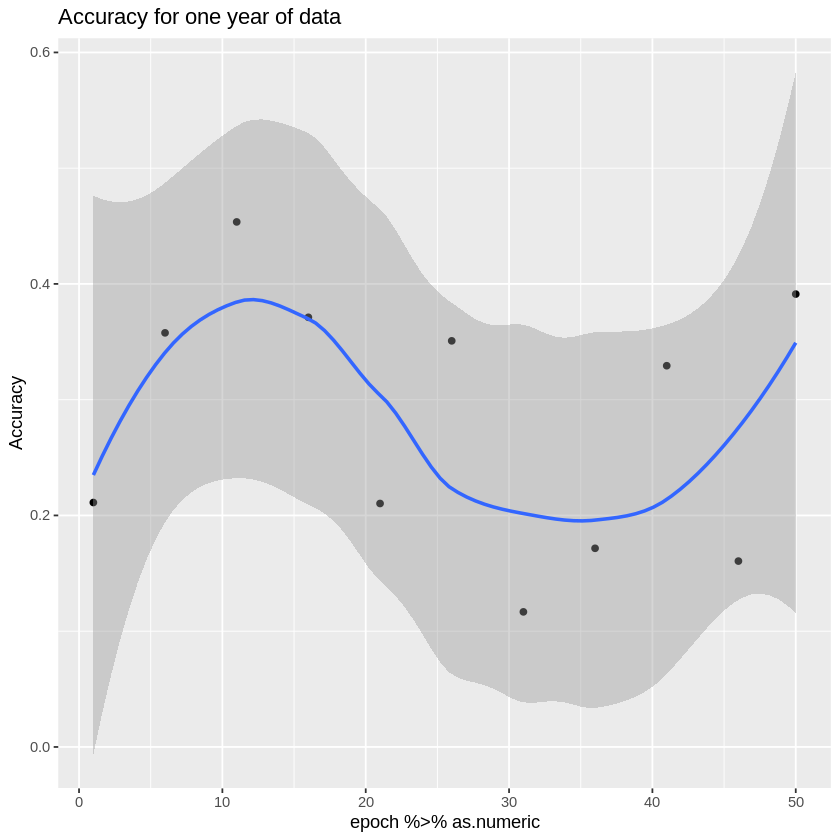

In [62]:
accuracy_dt_01[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()+
  ggtitle("Accuracy for one year of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


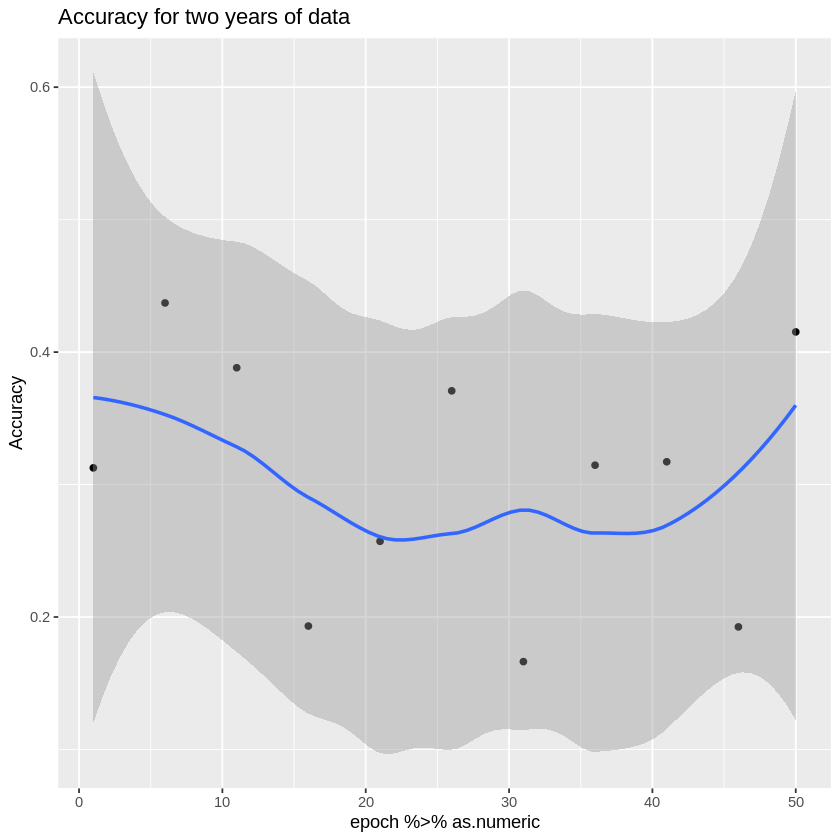

In [61]:
accuracy_dt_02[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()+
  ggtitle("Accuracy for two years of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


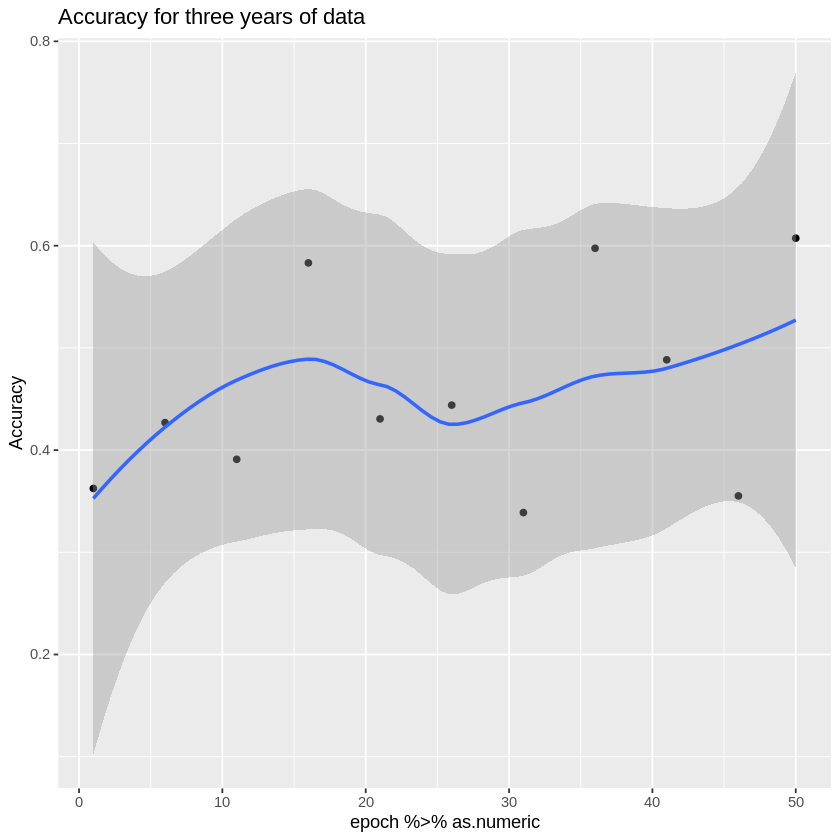

In [60]:
accuracy_dt_03[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()+
  ggtitle("Accuracy for three years of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 106 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 5.78”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 35.22”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 586.61”
Warning message in sqrt(sum.squares/one.delta):
“NaNs produced”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model

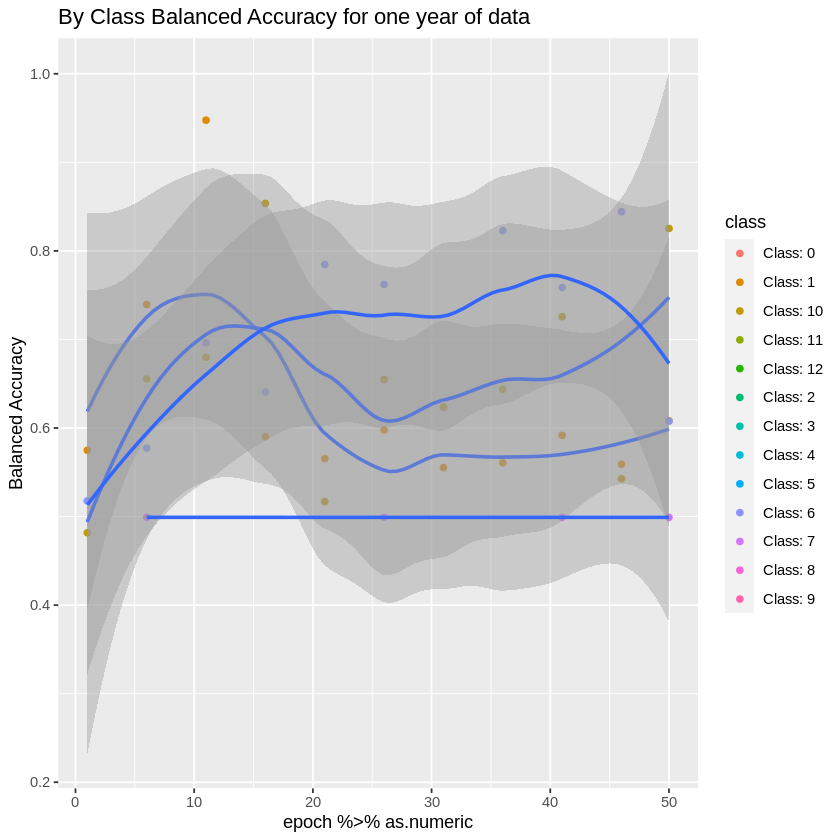

In [64]:
by_class_accuracy_dt_01[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()+
  ggtitle("By Class Balanced Accuracy for one year of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 89 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 25.88”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 20.12”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 199.37”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewe

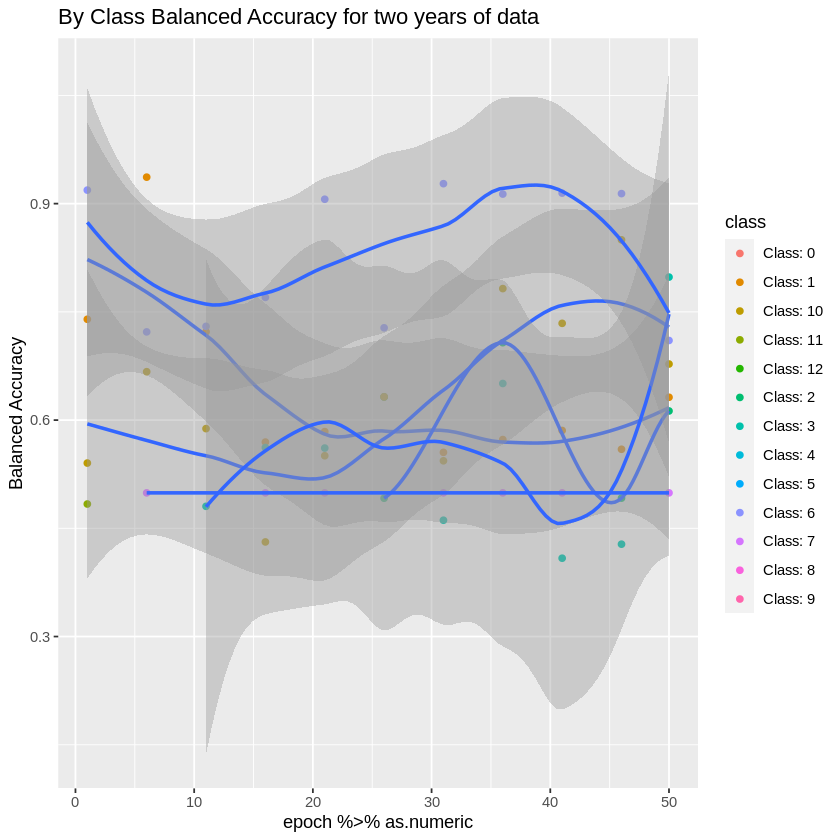

In [65]:
by_class_accuracy_dt_02[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()+
  ggtitle("By Class Balanced Accuracy for two years of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 85 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.775”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 15.225”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 913.55”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   few

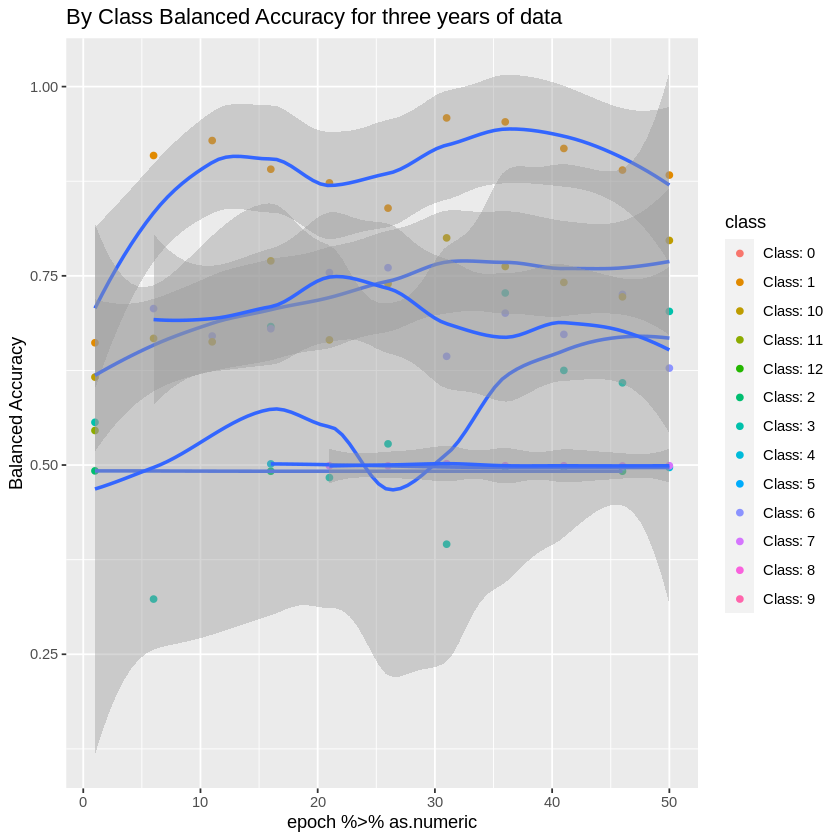

In [67]:
by_class_accuracy_dt_03[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()+
  ggtitle("By Class Balanced Accuracy for three years of data")

# Establish framework for another model prediction

In [ ]:
# use this to establish a new confusion matrix on other model epochs and predicitons
# copy this and update

# # https://drive.google.com/file/d/1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c/view?usp=drive_link
# drive_download(file = as_id('1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c'), path =  '/content/1year.zip', overwrite = TRUE)

# unzip("/content/1year.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/1year", unzip = "internal",
#       setTimes = FALSE)

# # copy the final prediction to the main model folder for 1, 2, and 3 years
# source_dir <- "/content/1year/model_03222023_1255/predictions"
# destination_dir <- "/content/1year/model_03222023_1255"
# tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
# for (file in tif_files) {
#   file_name <- basename(file)
#   destination_file <- file.path(destination_dir, file_name)
#   file.copy(file, destination_file)
# }

# file_list_01 <-list.files("/content/1year/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
# names(file_list_01) <- list.files("/content/1year/model_03222023_1255", pattern = "*.tif")

# id_dt_01 <-data.table(
#   path = file_list_01,
#   label_path = file_list_labels %>% rep(11) %>% unlist,
#   epoch = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[2]]}) %>% unlist,
#   tile_id = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[3]]}) %>% unlist)

# id_dt_01[tile_id=='planet',tile_id := epoch]
# id_dt_01[tile_id==epoch,epoch := 50]

# confusion_dt_01 <-
# 1:nrow(id_dt_01) %>%
#   lapply(function(x){
#   print(id_dt_01[x,]$path)
#   predict_rast <- stack(id_dt_01[x,]$path)
#   label_rast <- stack(id_dt_01[x,]$label_path)

#   out_dt_01 <- data.table(prediction = values(predict_rast) %>% unlist,label = values(label_rast) %>% unlist)
#   names(out_dt_01) <- c('prediction','label')
#   out_dt_01$epoch <- id_dt_01[x,]$epoch
#   out_dt_01$tile_id	 <- id_dt_01[x,]$tile_id
#   return(out_dt_01)
#   })  %>% rbindlist

# confusion_dt_01[,label:=factor(label %>% paste(),levels = c(0:12) %>% paste())]
# confusion_dt_01[,prediction:=factor(prediction %>% paste(),levels = c(0:12) %>% paste())]

# confusion_dt_01$prediction %>% levels
# confusion_dt_01$label %>%levels

# confusion_dt_01$label <- confusion_dt_01$label %>% paste %>% factor(levels = paste(0:12))
# confusion_dt_01$prediction <- confusion_dt_01$prediction %>% paste %>% factor(levels = paste(0:12))

# accuracy_dt_01<-
#   unique(confusion_dt_01$epoch) %>%
# lapply(function(x){
#   conf_dt <- confusion_dt_01[epoch ==x,]
#   # print(conf_dt)
#  out_dt_01 <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
#  out_dt_01$epoch <- x
#  return(out_dt_01)
# }) %>% rbindlist

# by_class_accuracy_dt_01<-
#   unique(confusion_dt_01$epoch) %>%
# lapply(function(x){
#   conf_dt_01 <- confusion_dt_01[epoch ==x,]
#   conf_mtrx_01 <- confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)
#  out_dt_01 <-  confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)$overall %>% t %>%  data.table

# out_dt_01 <- conf_mtrx_01$byClass %>% data.table
# out_dt_01$class <- row.names(conf_mtrx_01$byClass)
#  out_dt_01$epoch <- x
#  return(out_dt_01)
# }) %>% rbindlist

# accuracy_dt_01[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
#   geom_point()+
#   geom_smooth()+
#   ggtitle("Accuracy for one year of data")

# by_class_accuracy_dt_01[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
#   geom_point(aes(color=class))+
#   geom_smooth()+
#   ggtitle("By Class Balanced Accuracy for one year of data")

In [91]:
# set up for Model 1 year 0329 05 (data is already unziped)
# dir.create("/content/Model_1year_0329_05")
dir.create("/content/0329_05_1year")
dir.create("/content/0329_05_labels")

Warning message in dir.create("/content/0329_05_1year"):
“'/content/0329_05_1year' already exists”


In [ ]:
# https://drive.google.com/drive/folders/1LhDSeAbj8PP4WpEfT41C3_OH42xFvTWl?usp=drive_link
jp_folder = "1LhDSeAbj8PP4WpEfT41C3_OH42xFvTWl"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
files = drive_ls(folder_id)
for (i in seq_along(files$name)) {
  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/0329_05_1year/', i_dir$name[1])
      )
    })
  }


In [92]:
# Load ground truth labels
# https://drive.google.com/drive/folders/1Sr65Fv9VmJ_SV0BuLQl4nQXehKv8RTgf?usp=drive_link
jp_folder = "1Sr65Fv9VmJ_SV0BuLQl4nQXehKv8RTgf"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
files = drive_ls(folder_id)
for (i in seq_along(files$name)) {
  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/0329_05_labels/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name   id                                drive_resource   
  <chr>  <drv_id>                          <list>           
1 y_test 1Sr65Fv9VmJ_SV0BuLQl4nQXehKv8RTgf <named list [34]>


File downloaded:

• 1530_nwi_ccap_filled_utm4.tif <id: 14WfPIamsw5aFzl71xC3qoe1IzTGtB47H>

Saved locally as:

• /content/0329_05_labels/1530_nwi_ccap_filled_utm4.tif

File downloaded:

• 1532_nwi_ccap_filled_utm4.tif <id: 14Wu-SOFmup9RzjZo81QWeKGDzVyggZPo>

Saved locally as:

• /content/0329_05_labels/1532_nwi_ccap_filled_utm4.tif

File downloaded:

• 1557_nwi_ccap_filled_utm4.tif <id: 14WyVpDPN4E_QPdHxXn1gaDQ0IpY3nk0n>

Saved locally as:

• /content/0329_05_labels/1557_nwi_ccap_filled_utm4.tif

File downloaded:

• 1546_nwi_ccap_filled_utm4.tif <id: 14XFKxpOKeFaFIYCJlhDbRdFA0M7aeZrU>

Saved locally as:

• /content/0329_05_labels/1546_nwi_ccap_filled_utm4.tif

File downloaded:

• 2118_nwi_ccap_filled_utm4.tif <id: 14YKjoGBYfu_I3RT6A4SR2H3KptM9abc4>

Saved locally as:

• /content/0329_05_labels/2118_nwi_ccap_filled_utm4.tif

File downloaded:

• 2355_nwi_ccap_filled_utm4.tif <id: 14YLIPEVKEL4xdSI7oZEII_b1nF4A5dOw>

Saved locally as:

• /content/0329_05_labels/2355_nwi_ccap_filled_utm4.tif

In [ ]:
# # https://drive.google.com/drive/folders/1LhDSeAbj8PP4WpEfT41C3_OH42xFvTWl?usp=drive_link
# # drive_download(file = as_id('1LhDSeAbj8PP4WpEfT41C3_OH42xFvTWl'), path =  '/content/Model_1year_0329_05.zip', overwrite = TRUE)
# jp_folder = "1LhDSeAbj8PP4WpEfT41C3_OH42xFvTWl"
# folder_id = drive_get(as_id(jp_folder))
# print(folder_id)
# files = drive_ls(folder_id)
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ]
#     try({
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/Model_1year_0329_05/', i_dir$name[1], pattern = "\\.tif$")
#       )
#     })
#   }

#   # tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)

In [ ]:
# do not need for 0329_05_1year, data is already unziped and read as individual files
# unzip("/content/Model_1year_0329_05.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/1year_0329_05", unzip = "internal",
#       setTimes = FALSE)

# # do not need for 0329_05_1year, "prediction" data is already in main folder
# # copy the final prediction to the main model folder for 1, 2, and 3 years
# source_dir <- "/content/1year/model_03222023_1255/predictions"
# destination_dir <- "/content/1year/model_03222023_1255"
# tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
# for (file in tif_files) {
#   file_name <- basename(file)
#   destination_file <- file.path(destination_dir, file_name)
#   file.copy(file, destination_file)
# }

In [93]:
file_list_01 <-list.files("/content/0329_05_1year", pattern = "*.tif", full.names = TRUE)
names(file_list_01) <- list.files("/content/0329_05_1year", pattern = "*.tif")

In [94]:
file_list_labels <-list.files("/content/0329_05_labels", pattern = "*.tif", full.names = TRUE)

In [96]:
file_list_labels %>% length

[1] 19

In [97]:
file_list_01  %>% length

[1] 209

In [98]:
id_dt_01 <- data.table(
  path = file_list_01,
  label_path = file_list_labels %>% rep(11) %>% unlist,
  epoch = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[2]]}) %>% unlist,
  tile_id = (file_list_01 %>% names) %>% strsplit('_') %>% lapply(function(x){x[[3]]}) %>% unlist)

In [99]:
id_dt_01[tile_id=='planet',tile_id := epoch]
id_dt_01[tile_id==epoch,epoch := 50]

In [100]:
id_dt_01

path,label_path,epoch,tile_id
<chr>,<chr>,<chr>,<chr>
/content/0329_05_1year/epoch_1_1370_planet_stack_utm4.tif,/content/0329_05_labels/1370_nwi_ccap_filled_utm4.tif,1,1370
/content/0329_05_1year/epoch_1_1472_planet_stack_utm4.tif,/content/0329_05_labels/1472_nwi_ccap_filled_utm4.tif,1,1472
/content/0329_05_1year/epoch_1_1498_planet_stack_utm4.tif,/content/0329_05_labels/1498_nwi_ccap_filled_utm4.tif,1,1498
/content/0329_05_1year/epoch_1_1530_planet_stack_utm4.tif,/content/0329_05_labels/1530_nwi_ccap_filled_utm4.tif,1,1530
/content/0329_05_1year/epoch_1_1532_planet_stack_utm4.tif,/content/0329_05_labels/1532_nwi_ccap_filled_utm4.tif,1,1532
/content/0329_05_1year/epoch_1_1546_planet_stack_utm4.tif,/content/0329_05_labels/1546_nwi_ccap_filled_utm4.tif,1,1546
/content/0329_05_1year/epoch_1_155_planet_stack_utm4.tif,/content/0329_05_labels/155_nwi_ccap_filled_utm4.tif,1,155
/content/0329_05_1year/epoch_1_1557_planet_stack_utm4.tif,/content/0329_05_labels/1557_nwi_ccap_filled_utm4.tif,1,1557
/content/0329_05_1year/epoch_1_170_planet_stack_utm4.tif,/content/0329_05_labels/170_nwi_ccap_filled_utm4.tif,1,170


In [101]:
confusion_dt_01 <-
1:nrow(id_dt_01) %>%
  lapply(function(x){
  print(id_dt_01[x,]$path)
  predict_rast <- stack(id_dt_01[x,]$path)
  label_rast <- stack(id_dt_01[x,]$label_path)

  out_dt_01 <- data.table(prediction = values(predict_rast) %>% unlist,label = values(label_rast) %>% unlist)
  names(out_dt_01) <- c('prediction','label')
  out_dt_01$epoch <- id_dt_01[x,]$epoch
  out_dt_01$tile_id	 <- id_dt_01[x,]$tile_id
  return(out_dt_01)
  })  %>% rbindlist

[1] "/content/0329_05_1year/epoch_1_1370_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1472_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1498_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1530_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1532_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1546_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_155_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_1557_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_170_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_2118_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_2179_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_221_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_2355_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_253_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_281_planet_stack_utm4.tif"
[1] "/content/0329_05_1year/epoch_1_762_plane

In [102]:
confusion_dt_01

prediction,label,epoch,tile_id
<dbl>,<dbl>,<chr>,<chr>
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370


In [103]:
confusion_dt_01[,label:=factor(label %>% paste(),levels = c(0:12) %>% paste())]
confusion_dt_01[,prediction:=factor(prediction %>% paste(),levels = c(0:12) %>% paste())]

confusion_dt_01$prediction %>% levels
confusion_dt_01$label %>%levels

confusion_dt_01$label <- confusion_dt_01$label %>% paste %>% factor(levels = paste(0:12))
confusion_dt_01$prediction <- confusion_dt_01$prediction %>% paste %>% factor(levels = paste(0:12))

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12"

In [104]:
confusion_dt_01

prediction,label,epoch,tile_id
<fct>,<fct>,<chr>,<chr>
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370
10,10,1,1370


In [105]:
accuracy_dt_01<-
  unique(confusion_dt_01$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_01[epoch ==x,]
  # print(conf_dt)
 out_dt_01 <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt_01$epoch <- x
 return(out_dt_01)
}) %>% rbindlist

In [113]:
accuracy_dt_01

Accuracy,Kappa,AccuracyLower,AccuracyUpper,AccuracyNull,AccuracyPValue,McnemarPValue,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.2135502,0.01951890,0.2130705,0.2140306,0.9055294,1,NaN,1
0.2581851,0.14301862,0.2576728,0.2586980,0.6112128,1,NaN,11
0.3052465,0.17362238,0.3047072,0.3057861,0.5115506,1,NaN,16
0.1754497,0.07843278,0.1750044,0.1758955,0.8951109,1,NaN,21
0.3582189,0.23262973,0.3576574,0.3587807,0.5141634,1,NaN,26
0.2785220,0.16935443,0.2779971,0.2790473,0.6268953,1,NaN,31
0.3155407,0.18887485,0.3149965,0.3160852,0.4830711,1,NaN,36
0.2524507,0.14615282,0.2519421,0.2529598,0.6986245,1,NaN,41
0.2988610,0.16783942,0.2983250,0.2993974,0.4347920,1,NaN,46


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


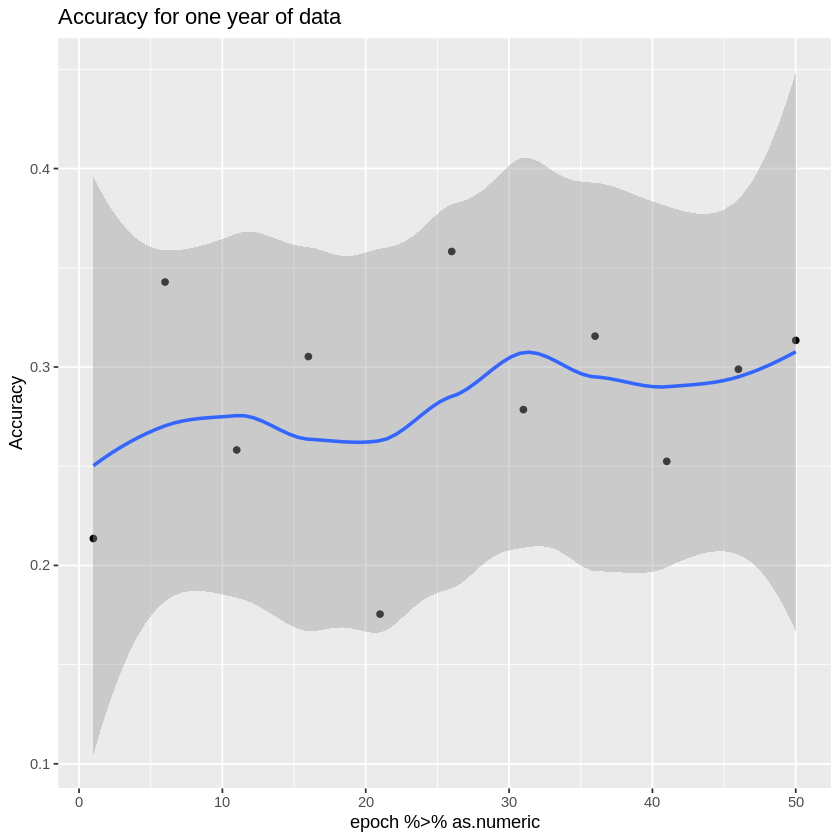

In [107]:
accuracy_dt_01[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()+
  ggtitle("Accuracy for one year of data")

In [108]:
by_class_accuracy_dt_01<-
  unique(confusion_dt_01$epoch) %>%
lapply(function(x){
  conf_dt_01 <- confusion_dt_01[epoch ==x,]
  conf_mtrx_01 <- confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)
 out_dt_01 <-  confusionMatrix(conf_dt_01$label,conf_dt_01$prediction)$overall %>% t %>%  data.table

out_dt_01 <- conf_mtrx_01$byClass %>% data.table
out_dt_01$class <- row.names(conf_mtrx_01$byClass)
 out_dt_01$epoch <- x
 return(out_dt_01)
}) %>% rbindlist

In [111]:
by_class_accuracy_dt_01 %>% names

[1] "Sensitivity"          "Specificity"          "Pos Pred Value"      
 [4] "Neg Pred Value"       "Precision"            "Recall"              
 [7] "F1"                   "Prevalence"           "Detection Rate"      
[10] "Detection Prevalence" "Balanced Accuracy"    "class"               
[13] "epoch"

In [115]:
by_class_accuracy_dt_01

Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy,class,epoch
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NA,1.0000000,NA,NA,NA,NA,NA,0.000000e+00,0.000000e+00,0.000000000,NA,Class: 0,1
1.00000000,0.9054045,3.018503e-05,1.0000000,3.018503e-05,1.00000000,6.036825e-05,2.855446e-06,2.855446e-06,0.094598067,0.9527023,Class: 1,1
NA,0.9798406,NA,NA,0.000000e+00,NA,NA,0.000000e+00,0.000000e+00,0.020159448,NA,Class: 2,1
0.15189873,0.7733959,9.451215e-05,0.9998454,9.451215e-05,0.15189873,1.889068e-04,1.409876e-04,2.141584e-05,0.226593553,0.4626473,Class: 3,1
NA,0.9842208,NA,NA,0.000000e+00,NA,NA,0.000000e+00,0.000000e+00,0.015779194,NA,Class: 4,1
NA,0.9588759,NA,NA,0.000000e+00,NA,NA,0.000000e+00,0.000000e+00,0.041124132,NA,Class: 5,1
0.30232558,0.8435652,2.966113e-05,0.9999873,2.966113e-05,0.30232558,5.931645e-05,1.534802e-05,4.640100e-06,0.156437032,0.5729454,Class: 6,1
0.34054442,0.9218529,3.783324e-02,0.9935865,3.783324e-02,0.34054442,6.810073e-02,8.942543e-03,3.045333e-03,0.080493592,0.6311987,Class: 7,1
0.15744681,0.9617260,3.449594e-04,0.9999265,3.449594e-04,0.15744681,6.884105e-04,8.387872e-05,1.320644e-05,0.038284034,0.5595864,Class: 8,1


In [118]:
order_by_class_accuracy_dt_01 <- by_class_accuracy_dt_01[order(epoch %>% as.numeric)]

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 93 rows containing missing values (`geom_point()`).”


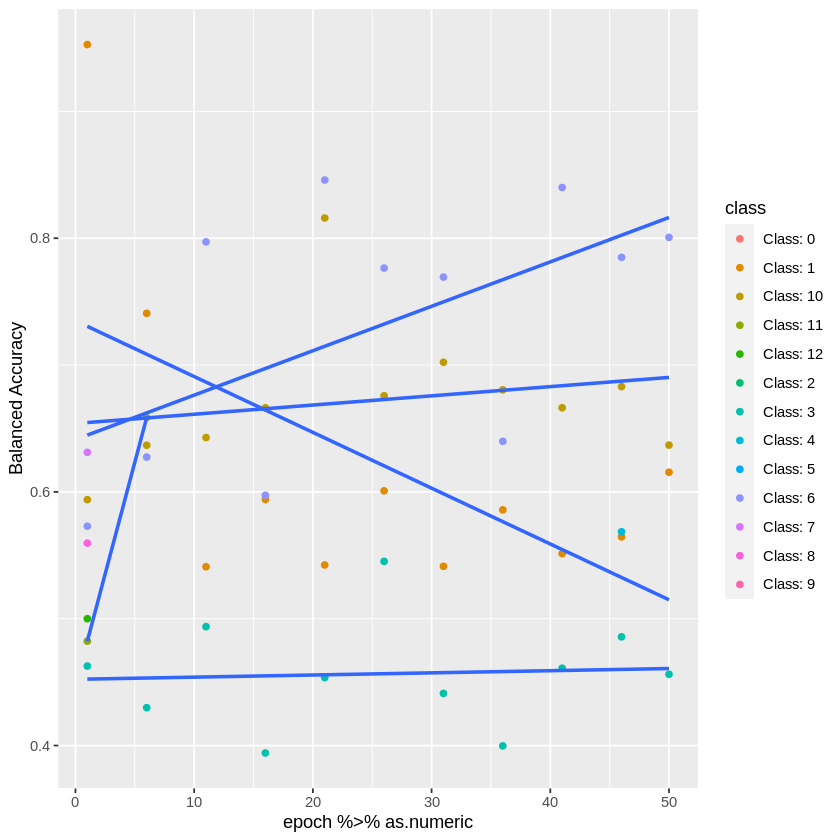

In [127]:
order_by_class_accuracy_dt_01 %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`, group = class))+
    geom_point(aes(color=class))+
    # geom_line(aes(color=class))+
    geom_smooth(method = lm, se = FALSE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  0.975”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.000625”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.975”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.025”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condi

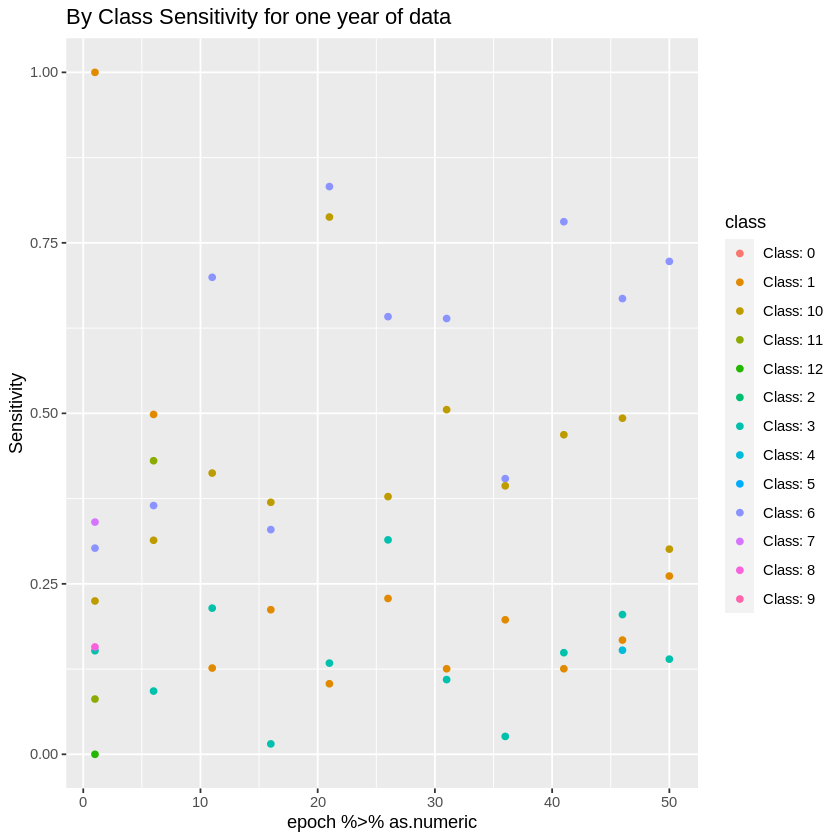

In [114]:

by_class_accuracy_dt_01[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Sensitivity`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()+
  ggtitle("By Class Sensitivity for one year of data")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  0.975”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  0.000625”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.975”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.025”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condi

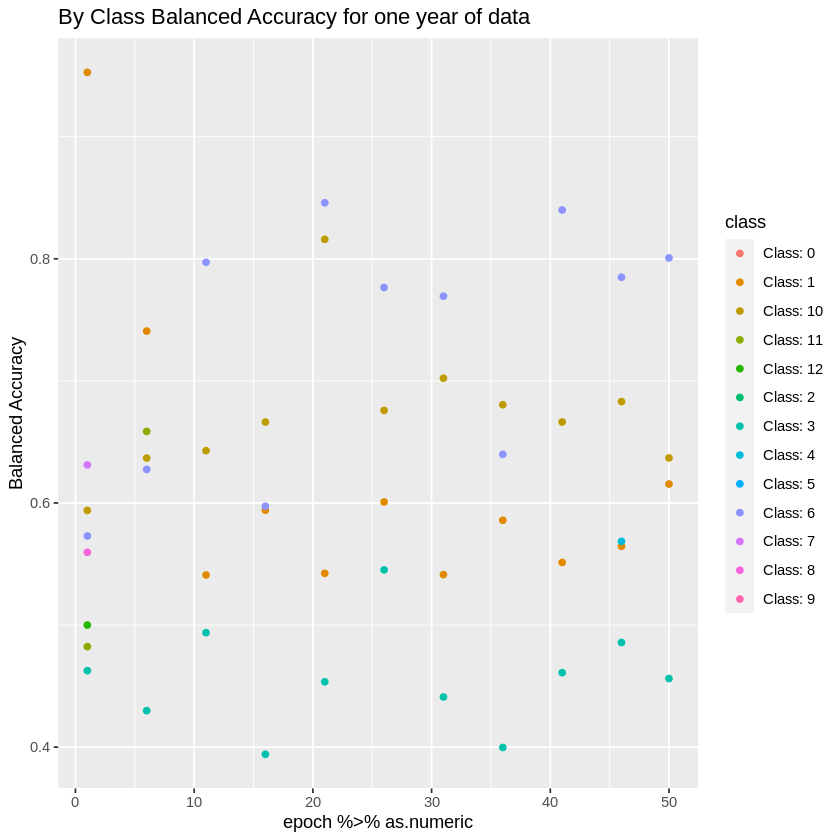

In [112]:
by_class_accuracy_dt_01[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()+
  ggtitle("By Class Balanced Accuracy for one year of data")